In [2]:
import bilby
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../vitamin_c/")
from gen_benchmark_pe import gen_template

In [3]:
%matplotlib inline

In [4]:
np.random.seed(45)

In [5]:
duration = 1
sampling_frequency = 1024
ref_geocent_time = 1325029268
start_time = ref_geocent_time - duration/2
waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                              reference_frequency=20.,
                              minimum_frequency=10.,
                              maximum_frequency=sampling_frequency/2.0)

In [6]:
Nt = sampling_frequency*duration

In [7]:
pars = {}
pars["mass_1"] = 50
pars["mass_2"] = 50
pars["a_1"] = 0.0
pars["a_2"] = 0.0
pars["tilt_1"] = 0.0
pars["tilt_2"] = 0.0
pars["phi_12"] = 0.0
pars["phi_jl"] = 0.0
pars["psi"] = 0.0
pars["theta_jn"] = 0.0
pars["phase"] = 0.0
pars["geocent_time"] = ref_geocent_time + 0.2
pars["ra"] = 1.375
pars["dec"] = -1.2108
pars["luminosity_distance"] = 1000
pars["det"] = ["H1","L1"]

In [8]:
psd_file = "/home/joseph.bayley/projects/o4_online_pe_mdc/data/asd_files/aLIGO_O4_high_asd.txt"

In [9]:
injection_parameters = dict(mass_1=pars['mass_1'],mass_2=pars['mass_2'], a_1=pars['a_1'], a_2=pars['a_2'], tilt_1=pars['tilt_1'], tilt_2=pars['tilt_2'],phi_12=pars['phi_12'], phi_jl=pars['phi_jl'], luminosity_distance=pars['luminosity_distance'], theta_jn=pars['theta_jn'], psi=pars['psi'],phase=pars['phase'], geocent_time=pars['geocent_time'], ra=pars['ra'], dec=pars['dec'])

In [10]:
waveform_generator = bilby.gw.WaveformGenerator(
        duration=duration, sampling_frequency=sampling_frequency,
        frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
        parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments=waveform_arguments,
        start_time=start_time)

09:24 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [11]:
wfg = waveform_generator
waveform_generator.parameters = injection_parameters

In [12]:
waveform_generator.parameters

{'mass_1': 50,
 'mass_2': 50,
 'a_1': 0.0,
 'a_2': 0.0,
 'tilt_1': 0.0,
 'tilt_2': 0.0,
 'phi_12': 0.0,
 'phi_jl': 0.0,
 'luminosity_distance': 1000,
 'theta_jn': 0.0,
 'phase': 0.0,
 'waveform_approximant': 'IMRPhenomPv2',
 'reference_frequency': 20.0,
 'minimum_frequency': 10.0,
 'maximum_frequency': 512.0}

In [13]:
freq_signal = wfg.frequency_domain_strain()

In [14]:
freq_signal

{'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
 'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}

In [15]:
plus_cross = np.array([freq_signal["plus"], freq_signal["cross"]])

In [16]:
freq_signal

{'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
 'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}

In [17]:
ifos = bilby.gw.detector.InterferometerList(pars['det'])
ifos1 = bilby.gw.detector.InterferometerList(pars['det'])

In [20]:
ifos[0].name

'H1'

In [18]:
for int_idx,ifo in enumerate(ifos):
    ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(asd_file=psd_file)
for int_idx,ifo in enumerate(ifos1):
    ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(asd_file=psd_file)


In [19]:
ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)
#ifos1.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)

/home/joseph.bayley/.local/lib/python3.7/site-packages/bilby/gw/detector/psd.py:362: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise


In [20]:
ifos1[0].set_strain_data_from_frequency_domain_strain(ifos[0].frequency_domain_strain,
                                                         sampling_frequency=sampling_frequency,
                                                         duration=duration,
                                                         start_time=start_time)
ifos1[1].set_strain_data_from_frequency_domain_strain(ifos[1].frequency_domain_strain,
                                                         sampling_frequency=sampling_frequency,
                                                         duration=duration,
                                                         start_time=start_time)

In [21]:
ifos.inject_signal(waveform_generator=waveform_generator,parameters=injection_parameters)
ifos1.inject_signal(waveform_generator=waveform_generator,parameters=injection_parameters)

04:00 bilby INFO    : Injected signal in H1:
04:00 bilby INFO    :   optimal SNR = 40.73
04:00 bilby INFO    :   matched filter SNR = 39.74+1.97j
04:00 bilby INFO    :   mass_1 = 50
04:00 bilby INFO    :   mass_2 = 50
04:00 bilby INFO    :   a_1 = 0.0
04:00 bilby INFO    :   a_2 = 0.0
04:00 bilby INFO    :   tilt_1 = 0.0
04:00 bilby INFO    :   tilt_2 = 0.0
04:00 bilby INFO    :   phi_12 = 0.0
04:00 bilby INFO    :   phi_jl = 0.0
04:00 bilby INFO    :   luminosity_distance = 1000
04:00 bilby INFO    :   theta_jn = 0.0
04:00 bilby INFO    :   psi = 0.0
04:00 bilby INFO    :   phase = 0.0
04:00 bilby INFO    :   geocent_time = 1325029268.2
04:00 bilby INFO    :   ra = 1.375
04:00 bilby INFO    :   dec = -1.2108
04:00 bilby INFO    : Injected signal in L1:
04:00 bilby INFO    :   optimal SNR = 30.52
04:00 bilby INFO    :   matched filter SNR = 29.96+1.82j
04:00 bilby INFO    :   mass_1 = 50
04:00 bilby INFO    :   mass_2 = 50
04:00 bilby INFO    :   a_1 = 0.0
04:00 bilby INFO    :   a_2 =

[{'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [62]:
np.sum(np.abs(ifos[0].strain_data.frequency_domain_strain - ifos1[0].strain_data.frequency_domain_strain))

0.0

In [24]:
ifos[0].strain_data.time_domain_strain

array([-2.81313044e-23,  1.18818153e-22, -9.68653256e-23, ...,
       -1.32505631e-22, -1.89403293e-22, -7.28388332e-23])

In [25]:
ifos1[0].strain_data.time_domain_strain

array([-2.81313044e-23,  1.18818153e-22, -9.68653256e-23, ...,
       -1.32505631e-22, -1.89403293e-22, -7.28388332e-23])

In [23]:
print(ifos[0].meta_data['optimal_SNR'])
print(ifos1[0].meta_data['optimal_SNR'])

40.73145825037711
40.73145825037711


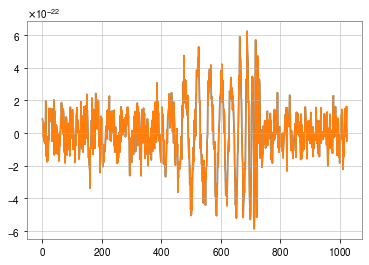

In [22]:
fig, ax = plt.subplots()
ax.plot(ifos[1].strain_data.time_domain_strain)
ax.plot(ifos1[1].strain_data.time_domain_strain)

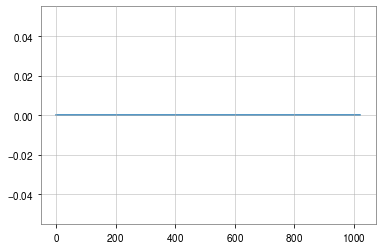

In [23]:
fig, ax = plt.subplots()
ax.plot(ifos[1].strain_data.time_domain_strain - ifos1[1].strain_data.time_domain_strain)

In [32]:
whitened_signal_td_all = []
whitened_h_td_all = []
for i in range(len(pars['det'])):
    # get frequency domain noise-free signal at detector                                                   
    signal_fd = ifos[i].get_detector_response(freq_signal, injection_parameters)

    # get frequency domain signal + noise at detector                                                      
    h_fd = ifos[i].strain_data.frequency_domain_strain
    # whiten frequency domain noise-free signal (and reshape/flatten)                                  
    whitened_signal_fd = signal_fd/ifos[i].amplitude_spectral_density_array
    #whitened_signal_fd = whitened_signal_fd.reshape(whitened_signal_fd.shape[0])                      

    # inverse FFT noise-free signal back to time domain and normalise                                  
    whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)

    # whiten noisy frequency domain signal                                                             
    whitened_h_fd = h_fd/ifos[i].amplitude_spectral_density_array

    # inverse FFT noisy signal back to time domain and normalise                                       
    whitened_h_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_h_fd)
    whitened_h_td_all.append([whitened_h_td])
    whitened_signal_td_all.append(whitened_signal_td)

In [44]:
plus_cross.shape

(2, 513)

In [45]:
plus_cross = np.transpose(plus_cross, (1,0))

In [46]:
whitened_signals_td = []
for dt in range(len(pars['det'])):
    polarisations = {"plus":plus_cross[:,0], "cross":plus_cross[:,1]}
    signal_fd = ifos[dt].get_detector_response(polarisations, injection_parameters)
    whitened_signal_fd = signal_fd/ifos[dt].amplitude_spectral_density_array
    whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)
    whitened_signals_td.append(whitened_signal_td)

In [47]:
np.shape(whitened_signal_td_all)

(2, 1024)

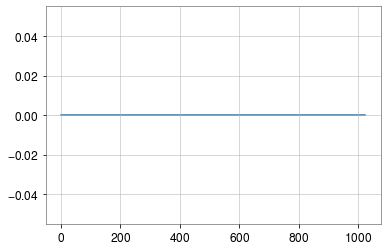

In [48]:
fig, ax = plt.subplots()
ax.plot(whitened_signals_td[0]-whitened_signal_td_all[0])
#ax.plot(whitened_signal_td_all[0])

In [40]:
resp_fd = []
Nt = len(wfg_pol)
for ifo in ifos:
    signal_fd = ifo.get_detector_response(wfg_pol, injection_parameters)
    whitened_signal_fd = signal_fd/ifo.amplitude_spectral_density_array
    whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)
    resp_fd.append(whitened_signal_td)

In [41]:
ifo.strain_data.frequency_array

array([  0.,   1.,   2., ..., 510., 511., 512.])

In [17]:
resp_old = resp_fd[0]

In [36]:
asd_old = ifo.amplitude_spectral_density_array

/home/joseph.bayley/.conda/envs/vitc_newkeras/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


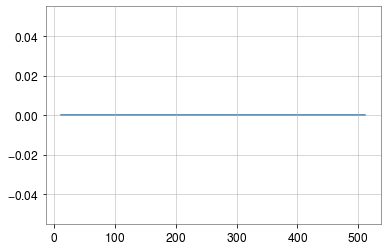

In [43]:
fig, ax = plt.subplots()
ax.plot(ifo.amplitude_spectral_density_array-asd_old)
#ax.plot(asd_old)
#ax.set_yscale('log')

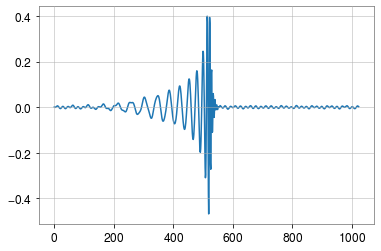

In [23]:
fig, ax = plt.subplots()
ax.plot(resp_fd[0])

In [75]:
pol_inj = ifos.inject_signal(injection_polarizations = wfg_pol, parameters = injection_parameters)

01:16 bilby WARNING : Injecting signal outside segment, start_time=1325029267.5, merger time=0.0.
01:16 bilby INFO    : Injected signal in H1:
01:16 bilby INFO    :   optimal SNR = 39.26
01:16 bilby INFO    :   matched filter SNR = 38.97-0.53j
01:16 bilby INFO    :   mass_1 = 50
01:16 bilby INFO    :   mass_2 = 50
01:16 bilby INFO    :   a_1 = 0.0
01:16 bilby INFO    :   a_2 = 0.0
01:16 bilby INFO    :   tilt_1 = 0.0
01:16 bilby INFO    :   tilt_2 = 0.0
01:16 bilby INFO    :   phi_12 = 0.0
01:16 bilby INFO    :   phi_jl = 0.0
01:16 bilby INFO    :   luminosity_distance = 1000
01:16 bilby INFO    :   theta_jn = 0.0
01:16 bilby INFO    :   psi = 0.0
01:16 bilby INFO    :   phase = 0.0
01:16 bilby INFO    :   geocent_time = 0.0
01:16 bilby INFO    :   ra = 1.375
01:16 bilby INFO    :   dec = -1.2108
01:16 bilby WARNING : Injecting signal outside segment, start_time=1325029267.5, merger time=0.0.
01:16 bilby INFO    : Injected signal in L1:
01:16 bilby INFO    :   optimal SNR = 29.75
01:16

In [34]:
inj_pol = ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_parameters)

07:47 bilby WARNING : Injecting signal outside segment, start_time=1325029267.5, merger time=0.0.
07:47 bilby INFO    : Injected signal in H1:
07:47 bilby INFO    :   optimal SNR = 39.26
07:47 bilby INFO    :   matched filter SNR = 115.68-1.66j
07:47 bilby INFO    :   mass_1 = 50
07:47 bilby INFO    :   mass_2 = 50
07:47 bilby INFO    :   a_1 = 0.0
07:47 bilby INFO    :   a_2 = 0.0
07:47 bilby INFO    :   tilt_1 = 0.0
07:47 bilby INFO    :   tilt_2 = 0.0
07:47 bilby INFO    :   phi_12 = 0.0
07:47 bilby INFO    :   phi_jl = 0.0
07:47 bilby INFO    :   luminosity_distance = 1000
07:47 bilby INFO    :   theta_jn = 0.0
07:47 bilby INFO    :   psi = 0.0
07:47 bilby INFO    :   phase = 0.0
07:47 bilby INFO    :   geocent_time = 0.0
07:47 bilby INFO    :   ra = 1.375
07:47 bilby INFO    :   dec = -1.2108
07:47 bilby WARNING : Injecting signal outside segment, start_time=1325029267.5, merger time=0.0.
07:47 bilby INFO    : Injected signal in L1:
07:47 bilby INFO    :   optimal SNR = 29.75
07:4

In [46]:
np.sum(pol_inj[0]['plus'])

(4.804717190910345e-22-1.0874575677400692e-22j)

In [41]:
np.sum(pol_inj[0]['plus'] - inj_pol[0]['plus'])

0j

In [66]:
priors = bilby.gw.prior.BBHPriorDict()
priors.pop('chirp_mass')
priors['mass_ratio'] = bilby.gw.prior.Constraint(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None)
priors['mass_1'] = bilby.gw.prior.Uniform(name='mass_1', minimum=35, maximum=80, unit='$M_{\odot}$')
priors['mass_2'] = bilby.gw.prior.Uniform(name='mass_2', minimum=35, maximum=80, unit='$M_{\odot}$')
priors['geocent_time'] = bilby.core.prior.Uniform(minimum=ref_geocent_time + 0.15,maximum=ref_geocent_time + 0.35,name='geocent_time', latex_label='$t_c$', unit='$s$')

04:11 bilby INFO    : No prior given, using default BBH priors in /home/joseph.bayley/.local/lib/python3.7/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.


In [70]:
pars2 = priors.sample()
pars2["det"] = pars["det"]

In [71]:
train_hplus_hcross, injpars, wfg = gen_template(duration,sampling_frequency,
                                                                pars2,ref_geocent_time,[psd_file],
                                                                use_real_det_noise=False,
                                                                return_polarisations=True)

04:12 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [72]:
test_samples_noisefree,test_samples_noisy,injection_parameters,ifos,waveform_generator = gen_template(duration,sampling_frequency,pars2,ref_geocent_time,[psd_file])

04:12 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
04:12 bilby INFO    : Injected signal in H1:
04:12 bilby INFO    :   optimal SNR = 6.36
04:12 bilby INFO    :   matched filter SNR = 7.48+0.98j
04:12 bilby INFO    :   mass_1 = 54.09970449603983
04:12 bilby INFO    :   mass_2 = 42.03680900991128
04:12 bilby INFO    :   a_1 = 0.4853896661327851
04:12 bilby INFO    :   a_2 = 0.5290751812687172
04:12 bilby INFO    :   tilt_1 = 2.971666808319773
04:12 bilby INFO    :   tilt_2 = 0.9437024429245895
04:12 bilby INFO    :   phi_12 = 1.7876927195609587
04:12 bilby INFO    :   phi_jl = 3.4599922659798588
04:12 bilby INFO    :   luminosity_distance = 3862.455797030312
04:12 bilby INFO    :   theta_jn = 0.8107472145729007
04:12 bilby INFO    :   psi = 2.488406991036923
04:12 bilby INFO    :   phase = 1.8

... Injected signal
... Whitened signals


In [102]:
ifos = bilby.gw.detector.InterferometerList(pars['det'])
for int_idx,ifo in enumerate(ifos):
    ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(asd_file=psd_file)
ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)

/home/joseph.bayley/.local/lib/python3.7/site-packages/bilby/gw/detector/psd.py:362: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise


In [103]:
np.sum(waveform_generator.frequency_domain_strain()["plus"] - train_hplus_hcross[0])

0j

In [134]:
resp_fd = []
Nt = len(train_hplus_hcross[0])*2
polarisations = {"plus":train_hplus_hcross[0],"cross":train_hplus_hcross[1]}
for ifo in ifos:
    signal_fd = ifo.get_detector_response(polarisations, injpars)
    whitened_signal_fd = signal_fd/ifo.amplitude_spectral_density_array
    whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)
    resp_fd.append(whitened_signal_td)

In [135]:
ifos = bilby.gw.detector.InterferometerList(pars['det'])
psd_files = [psd_file]
# If user is specifying PSD files       

freq_signal = waveform_generator.frequency_domain_strain()
if len(psd_files) > 0:
    type_psd = psd_files[0].split('/')[-1].split('_')[-1].split('.')[0]
    for int_idx,ifo in enumerate(ifos):
        if type_psd == 'psd':
            ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(psd_file=psd_files[0])
        elif type_psd == 'asd':
            ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(asd_file=psd_files[0])
        else:
            print('Could not determine whether psd or asd ...')
            exit()

ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration, start_time=start_time)

ifos.inject_signal(waveform_generator=waveform_generator,
                           parameters=injection_parameters)


whitened_signal_td_all = []
whitened_h_td_all = []
# iterate over ifos                                                                                        
whiten_data = True
for i in range(len(pars['det'])):
    # get frequency domain noise-free signal at detector                                                   
    signal_fd = ifos[i].get_detector_response(freq_signal, injection_parameters)

    # get frequency domain signal + noise at detector                                                      
    h_fd = ifos[i].strain_data.frequency_domain_strain

    # whitening       
    # whiten frequency domain noise-free signal (and reshape/flatten)                                  
    whitened_signal_fd = signal_fd/ifos[i].amplitude_spectral_density_array
    #whitened_signal_fd = whitened_signal_fd.reshape(whitened_signal_fd.shape[0])                      

    # inverse FFT noise-free signal back to time domain and normalise                                  
    whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)

    # whiten noisy frequency domain signal                                                             
    whitened_h_fd = h_fd/ifos[i].amplitude_spectral_density_array

    # inverse FFT noisy signal back to time domain and normalise                                       
    whitened_h_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_h_fd)

    whitened_h_td_all.append([whitened_h_td])
    whitened_signal_td_all.append(whitened_signal_td)

/home/joseph.bayley/.local/lib/python3.7/site-packages/bilby/gw/detector/psd.py:362: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
06:31 bilby INFO    : Injected signal in H1:
06:31 bilby INFO    :   optimal SNR = 6.36
06:31 bilby INFO    :   matched filter SNR = 4.38+1.02j
06:31 bilby INFO    :   mass_1 = 54.09970449603983
06:31 bilby INFO    :   mass_2 = 42.03680900991128
06:31 bilby INFO    :   a_1 = 0.4853896661327851
06:31 bilby INFO    :   a_2 = 0.5290751812687172
06:31 bilby INFO    :   tilt_1 = 2.971666808319773
06:31 bilby INFO    :   tilt_2 = 0.9437024429245895
06:31 bilby INFO    :   phi_12 = 1.7876927195609587
06:31 bilby INFO    :   phi_jl = 3.4599922659798588
06:31 bilby INFO    :   luminosity_distance = 3862.455797030312
06:31 bilby INFO    :   theta_jn = 0.8107472145729007
06:31 bilby INFO    :   psi = 2.488406991036923
06:31 bilby INFO    :   phase = 1.84037

In [136]:
Nt

1026

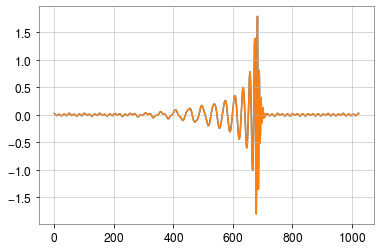

In [138]:
fig, ax = plt.subplots()
ax.plot(test_samples_noisefree[0])
ax.plot(whitened_signal_td_all[0])

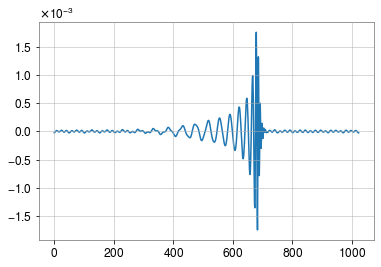

In [148]:
fig, ax = plt.subplots()
ax.plot((test_samples_noisefree[0]-whitened_signal_td_all[0]))


In [150]:
np.mean(test_samples_noisefree[0]/whitened_signal_td_all[0])

0.9990248656871401

In [152]:
1 - 0.9990248656871401

0.0009751343128598933